<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |  **100**
|--------------------------|--------
|  **Weight**              |  **20% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Friday, May 24**
|  **Submission mode**     |  **Electronic, Using GitLab <br/> One submission per group**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-2.ipynb` and any other additional files that you may have created / hyperlinked in this notebook, as part of your submission by pushing it to your forked GitLab repository. You need to add your group details below. Make sure your group works on and submits only one fork of the assignment repository. 


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* With respect to any code that you submit, you will be marked on the **correctness** and **readability** of your code. If your marker can't understand your code, your marks may be deducted.

<span style="color:blue">
    
### Group Number :  014

### Student IDs: u6342240, u6660171, u6688485

</span>

## Introduction



In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift

***

## Section A - Database Management (15 Marks)

You have been given the following database containing 15 tables relating to **DVD Movie Rentals**. The data contained in these tables is as follows -

|  **Table**               |  **Data Description**      |
|--------------------------|----------------------------|
|  actor                   |  actors data including first name and last name     |
|  film                    |  films data such as title, release year, length, rating, etc      |
|  film_actor              |  stores the relationships between films and actors |
|  category                |  stores film’s categories data |
|  film_category           |  stores the relationships between films and categories | 
|  store                   |  store data including manager staff and address |
|  inventory               |  stores inventory data |
|  rental                  |  stores rental data |
|  payment                 |  stores customer's payments |
|  staff                   |  stores staff data |
|  customer                |  stores customer data |
|  address                 |  address data for staff and customers |
|  city                    |  stores city data |
|  country                 |  stores country data |

Visualizing the relations between these tables can be aided by looking at the below **E-R Diagram**.

<img src='./dvd_rental_er.png'>

Based on your understanding of the relationships between these tables, answer the following questions by writing SQL queries to get the required data rows from the database and display them as a **Pandas dataframe**. 

***
#### **NOTE**:
For the following questions, in the CSIT labs you will be able to connect directly to the database using the below code within the notebook. From outside of the CSIT labs, you will need to perform SQL queries in your terminal by using [partch](https://cs.anu.edu.au/docs/student-computing-environment/linuxlabs/remoteaccess/#connectingtopartch3). Once you have the correct query, you may just fill in the boxes below.

**Partch Instructions**
1. Connect to partch as per the above hyperlink
2. In your terminal, enter `psql` to access the sql database
3. Enter `\c dvdrental` to ensure you are accessing the assignment database (or simply specify dvdrental when connecting to the database server -- `psql dvdrental`).
4. (Sanity Check) Enter `SELECT * FROM actor;` . If you receive the first row to be "Penelope Guiness", you should be good to go !
***

In [3]:
# Connect using psycopg2
conn = psycopg2.connect(host="/var/run/postgresql", database="dvdrental")

# Activate connection cursor
curr = conn.cursor()

OperationalError: could not translate host name "/var/run/postgresql" to address: Unknown host


In [5]:
def execute_sql(query):
    # Select table and display
    curr.execute(query)

    # Fetches all the rows from the result of the query
    rows = curr.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in curr.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 1. Write an SQL query to determine the total sales from the rentals of the film 'Affair Prejudice' from the rental store with `store_id = 2`. Your query should result in a single column called `Total Rental Cost` with the value of the total cost of all these rentals.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [ ]:
# YOUR QUERY HERE

query = """select sum(amount) as total_rental_cost from payment where rental_id in 
                (select rental_id from rental where inventory_id in 
                    (select inventory_id from inventory where film_id in 
                        (select film_id from Film where title = 'Affair Prejudice') and store_id =2));"""
execute_sql(query)

### 2. Write an SQL query to retrieve the names of all customers who rented the film ‘Affair Prejudice’ from the store with `store_id = 1`. The result of your query should display each customer's first name and last name. 
<span style= 'float: right;'><b>[3 marks]</b></span>

In [6]:
# YOUR QUERY HERE

query = """ select distinct first_name, last_name from customer where customer_id in
                (select customer_id from rental where inventory_id in 
                    (select inventory_id from inventory where film_id in 
                        (select film_id from Film where title = 'Affair Prejudice') and store_id =1));"""
execute_sql(query)
# Sorted on the first letter of the first_name from A to Z.

NameError: name 'curr' is not defined

### 3. Write an SQL query to retrieve the names of all those customers who have a total of more than 100 dollars in recorded payments. Your query's result should include each customer's first name, last name and customer ID. 
<span style= 'float: right;'><b>[4 marks]</b></span>

In [7]:
# YOUR QUERY HERE
query = """select first_name, last_name, customer_id from customer where customer_id in 
                (select customer_id from 
                    (select customer_id, sum(amount) from payment group by customer_id) 
                        as pay_customer where sum>100);"""


execute_sql(query)
# No need to sort as has been sorted on the customer_id.

,first_name,last_name,customer_id
0,Mary,Smith,1
1,Patricia,Johnson,2
2,Linda,Williams,3
3,Elizabeth,Brown,5
4,Maria,Miller,7
5,Karen,Jackson,13
6,Helen,Harris,15
7,Sandra,Martin,16
8,Sharon,Robinson,20
9,Michelle,Clark,21


### 4. Write an SQL query to retrieve the names of all customers who have rented the movie ‘Angels Life’ from *both* stores with `store_id = 1` and `store_id = 2`. Your query's result should include each customer's first name, last name and customer ID.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [8]:
# YOUR QUERY HERE

query = """ select first_name, last_name, customer_id from customer where customer_id in
                (select customer_id from rental where inventory_id in 
                    (select inventory_id from inventory where film_id in 
                        (select film_id from Film where title = 'Angels Life') and store_id =1) intersect
                select customer_id from rental where inventory_id in 
                    (select inventory_id from inventory where film_id in 
                        (select film_id from Film where title = 'Angels Life') and store_id =2));"""

execute_sql(query)

,first_name,last_name,customer_id
0,Cathy,Spencer,163


***

## Section B - Data Acquisition (20 Marks)

In this section, you need to read and import the data from the database into Python and make it ready to be used by your machine learning algorithms in the next section. **Your task here is to load the required columns from the various appropriate tables in the database to fuel the data required to train your machine learning models in the next section.** You can load the required data into one or more Pandas dataframes, to suit the the needs of different Machine Learning models in Section C. 

If you fail to do so, or an error in the previous section is preventing you from doing so, we can provide you with a **CSV of the required data**. If you choose to use this CSV, you will not receive any marks for this section, but you'll be able to do the following section without having to spend time on this section.  

<span style='color:red;'><b>Note:</b> While you are provided the .csv files to use for development of the later questions at home, you must submit a copy of the code that can read the database to receive marks for this section.</span>
<span style= 'float: right;'><b>[20 marks]</b></span>

In [9]:
# YOUR CODE HERE

'''
For Part 1 (clustering) in Section C, we just use 2 columns in film which are rental_duration and length.
For Part 2 (classification) in Section C, we just use 7 columns in film which are 
rental_duration, rental_rate, length, rating, special_features and film_id.
We also just use 2 columns in film_category which are category_id and film_id.
In addition, we just use 2 columns in film_actor which are category_id and film_id. We use group_by to get
the numbers of actors for each film.
'''

# Define SQL query
query_c_1 = """select rental_duration, length from film;"""
query_c_2_film = """select rental_duration, rental_rate, length, rating, special_features, film_id from film;"""
query_c_2_film_category = """select category_id, film_id from film_category;"""
query_c_2_film_actor = """select actor_id, film_id from film_actor;"""

# Get dataframe from SQL
dataframe_c_1=execute_sql(query_c_1)
dataframe_c_2_film=execute_sql(query_c_2_film)
dataframe_c_2_film_category=execute_sql(query_c_2_film_category)
dataframe_c_2_film_actor=execute_sql(query_c_2_film_actor)

dataframe_c_2_film_actor = dataframe_c_2_film_actor.groupby('film_id')['actor_id'].count()

# Change NaN data into 0
dataframe_c_1 = dataframe_c_1.fillna(0)
dataframe_c_2_film = dataframe_c_2_film.fillna(0)
dataframe_c_2_film_category = dataframe_c_2_film_category.fillna(0)
dataframe_c_2_film_actor = dataframe_c_2_film_actor.fillna(0)



***

## Section C - Machine Learning (55 Marks)
<span style='color:purple;'><b>Note:</b> We have provided the .csv outputs for the files to use in these questions if you are working on the assignment at home. Please note if any of these questions refer to those csvs and not the data from Section B in your submitted assignment, you will receive no marks for Section B.</span>

In [10]:
## Import csv files for home development here as necessary. 
homework_actor = pd.read_csv("data/dvd_rental/actor.csv")
# read in other csvs as necessary.

### Part 1 - Clustering (25 Marks)

### Part 1.1 - Clustering Short Answers (8 Marks)

#### 1. Can a Decision Tree be used to perform clustering? If so, explain how. If not, provide a counterexample showing how it is not suitable for the function.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

By its definition, decision tree is a supervised learning approach while clustering is an unsupervised learning one. The decision tree can work only if there are known labels. 

  However, decision trees can be used for clustering if there are another group of artificial normally distributed points added in (denote original data points as Obsv1, and added normal distribution points as Obsv2). The nodes of the decision tree is to find the density difference between Obsv1 and Obsv2. The leaf nodes of the decision tree is the clusters segmented based on density difference (between original points and added normal distribution points), which is what a clustering algorithm does. In this case, by determining the difference in density between the two mentioned group of points, the supervised decision tree can be used to do unsupervised clustering.
  
  In conclusion, by adding a set of normally distributed points, we can use decision trees to do clustering. 

#### 2. Will a K-means Clustering Algorithm generate the same results each time? Provide examples on how this may or may not be the case.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

- No it will not. The process and result of a K-Means algorithm depends on how the cluster centers are initialized. This happens because the K-means algorithm always finds the local minumum but never global minimum.
- In the example below, there are four points in the dataset and n_clusters = 2. The two cases simulate two different initializations. 

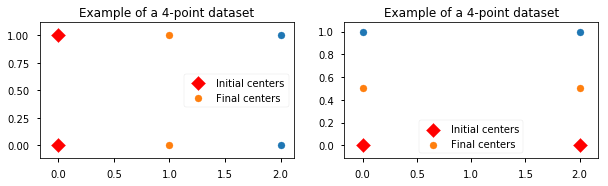

In [11]:
A = np.array([[0,0],[0,1],[2,0],[2,1]])
# Generate init centers
init_center1 = np.array([[0,0],[0,1]])
init_center2 = np.array([[0,0],[2,0]])
km1 = KMeans(n_clusters=2,init=init_center1)
km2 = KMeans(n_clusters=2,init=init_center2)
km1.fit(A)
km2.fit(A)

centers1 = km1.cluster_centers_
centers2 = km2.cluster_centers_

figure,ax = plt.subplots(1,2,figsize=[10,2.5])

# Plot the first case
ax[0].scatter(A[:,0],A[:,1])
ini1 = ax[0].scatter([0,0],[0,1],c='r',marker='D',s=100,label='Initial centers')
fin1 = ax[0].scatter(centers1[:,0],centers1[:,1])

# Plot the second case
ax[1].scatter(A[:,0],A[:,1])
ini2 = ax[1].scatter([0,2],[0,0],c='r',marker='D',s=100,label='Initial centers')
fin2 = ax[1].scatter(centers2[:,0],centers2[:,1])

ax[0].legend((ini1,fin1),('Initial centers','Final centers'))
ax[1].legend((ini2,fin2),('Initial centers','Final centers'))

ax[0].set_title('Example of a 4-point dataset')
ax[1].set_title('Example of a 4-point dataset')
plt.show()

- The four data points are (0,0),(0,1),(2,0),(2,1) respectively. The left figure is the final result when centers were initialized as (0,0) and (0,1)(i.e. the left two points), and the right figure is the final result when centers were initialized as (0,0) and (1,0)(i.e. the bottom two points). The figures clearly show that the final result for the same K-Means can be different.

### Part 1.2 - K-Means Clustering Implementation (17 Marks)

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  From the dataset acquired after completing **Section - B**, implement a `K-Means clustering algorithm` to help you cluster the dataset of customers on the basis of the movies they have rented from the DVD rental stores. Various attributes related to the movies such `rating`, `year`, `rental_rate` and `year` may be useful for this exercise. Another interesting attribute that you can look at is the `fulltext` of the movie. In terms of the customer details, you can look at which movies a customer has rented, and the total number of movies rented by a customer. After you've prepared your learning model, plot a **visualization** showing the different clusters. If you have used more than 2 features for your clustering, you are still expected to provide a visualization by reducing the dimensions into a 2D graph.

It's upto you to decide how many clusters you would like to incorporate in your model. You are expected to justify all aspects of your implementation including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>
<span style= 'float: right;'><b>[15 marks total: 10 marks model, 5 marks justification & commentary]</b></span>

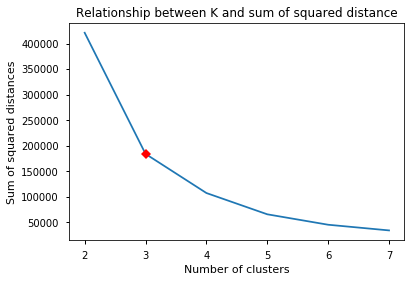

In [12]:
# YOUR CODE HERE
X_dataframe=dataframe_c_1
X = np.array(dataframe_c_1)
# Test all cluster number cases from 2 to 7
km2 = KMeans(n_clusters=2,init='k-means++')
km2.fit(X)
wss2 = km2.inertia_ # Get the sum of squared distance

km3 = KMeans(n_clusters=3,init='k-means++')
km3.fit(X)
wss3 = km3.inertia_

km4 = KMeans(n_clusters=4,init='k-means++')
km4.fit(X)
wss4 = km4.inertia_

km5 = KMeans(n_clusters=5,init='k-means++')
km5.fit(X)
wss5 = km5.inertia_

km6 = KMeans(n_clusters=6,init='k-means++')
km6.fit(X)
wss6 = km6.inertia_

km7 = KMeans(n_clusters=7,init='k-means++')
km7.fit(X)
wss7 = km7.inertia_

# Plot number of K and sum of squared distances of samples to their closest cluster center.
wsses = [wss2,wss3,wss4,wss5,wss6,wss7]
plt.plot([2,3,4,5,6,7],wsses)
plt.plot([3],wss3,'rD')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Relationship between K and sum of squared distance')
plt.show()




**Elbow method**
- The elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t give much better modeling of the data. So we should choose the 'elbow point' of the plot, which is K = 3 here.

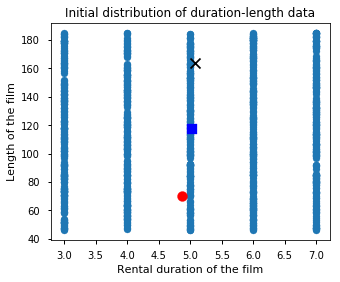

In [13]:
# YOUR CODE HERE

### Generate the K-Means model ###

# Config K-Means model
km = KMeans(n_clusters=3,init='k-means++')
markers = ['o','x','s']
colors = ['r','black','b']

km.fit(X)
centers = km.cluster_centers_
# Plot the data points
plt.figure(figsize=[5,4])
plt.scatter(X[:, 0], X[:, 1])

# Plot the centroids
for ind in range(len(markers)):
    plt.scatter(centers[ind, 0], centers[ind, 1], c=colors[ind], s=100, marker=markers[ind])

plt.xlabel('Rental duration of the film')
plt.ylabel('Length of the film')
plt.title('Initial distribution of duration-length data')
plt.show()

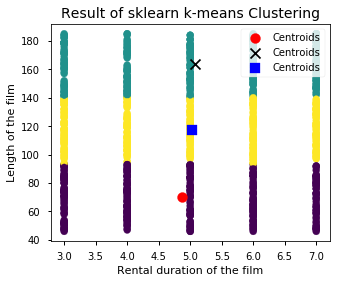

In [14]:
# Get the clusters
predicted_clusters = km.predict(X)

plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, cmap='viridis')
centers = km.cluster_centers_
for ind in range(len(markers)):
    plt.scatter(centers[ind, 0], centers[ind, 1], c=colors[ind], s=100, marker=markers[ind],label='Centroids')
plt.title('Result of sklearn k-means Clustering', fontsize=14)
plt.xlabel('Rental duration of the film')
plt.ylabel('Length of the film')
plt.legend(loc='upper right')
plt.show()


In [15]:
### Clustering result analysis ###
'''
 In this part, two ways are adopted to check the clustering result: 
 1. Evaluate the coordinates of cluster centroids 
 (i.e. x-axis for average rental duration and y-axis means the average length of the film in different clusters.)
 2. Get the mean rental duration and mean film length by dataframe operation.
 
 The aim is to check the meaning of clusters.
'''
# Choose 'rental_duration' and 'length' as analysis object
# Adding labels to the dataframe
X_dataframe['K-Means Label'] = km.labels_
# Calculate mean duration and length by dataframe operation
mean_durations = X_dataframe.groupby('K-Means Label').mean()['rental_duration']
mean_length = X_dataframe.groupby('K-Means Label').mean()['length']

print('Mean duration of the films for different clusters:\n',mean_durations)
print('\nX labels of the cluster centers:',centers[:,0])
print('\nMean length of the films for different clusters:\n ',mean_length)
print('\nY labels of the cluster centers:',centers[:,1])

Mean duration of the films for different clusters:
 K-Means Label
0    4.862857
1    5.073482
2    5.029674
Name: rental_duration, dtype: float64

X labels of the cluster centers: [4.86285714 5.07348243 5.02967359]

Mean length of the films for different clusters:
  K-Means Label
0     69.940000
1    163.555911
2    117.507418
Name: length, dtype: float64

Y labels of the cluster centers: [ 69.94       163.55591054 117.5074184 ]


---

**Silhouette evaluation**

- Silhouette analysis is used to determine the degree of separation between clusters.
- The coefficient is calculated as
$$\frac{b^i-a^i}{max(a^i,b^i)}$$
where: $a^i$ is the average distance from all data points in the same cluster, and $b^i$ is the average distance from all data points in the closest cluster.
- The range of the coefficient is in $[-1, 1]$.
  1. If it is 0 &rarr; the sample is very close to the neighboring clusters.
  2. It it is 1 &rarr; the sample is far away from the neighboring clusters.
  3. It it is -1 &rarr; the sample is assigned to the wrong clusters.
  
  
- The result of the silhouette plot indicates that the three clusters are nearly equally good - all with a silhouette score around 0.75, which is above average 0.588.

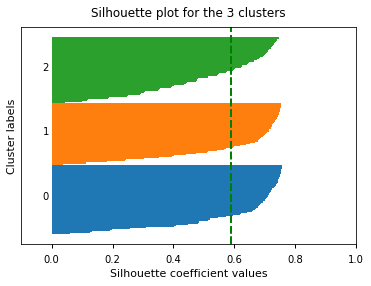

The average silhouette score is:  0.587986665260576


In [16]:
from sklearn.metrics import silhouette_samples
### Silhouette evaluation ###

# Get silhouette values of the dataframe
sih_vals = silhouette_samples(X_dataframe,predicted_clusters)
y_ticks = []
y_lower, y_upper = 0, 0
# Loop over every clusters
for i, cluster in enumerate(np.unique(predicted_clusters)):
    cluster_silhouette_vals = sih_vals[predicted_clusters == cluster]
    # Sort the silhouette values
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    # Plot the silhouette values
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    # Set y axis ticks
    plt.text(-0.03, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_vals)
    
    # Calculate the average silhouette score
    avg_score = np.mean(sih_vals)
    # Plot a avg line on the plot
    plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')
    plt.title('Silhouette plot for the 3 clusters', y=1.02);
    
plt.show()
print('The average silhouette score is: ',avg_score)

#### <span style="color:blue"> Your justifications & commentary here: </span>

**Motivation of the analysis**
- To make the clustering meaningful for the company (this is also why I did not apply PCA or TSNE to reduce the dimension, the x and y axis should be directly meaningful), the relationship between the ***Rental_Duration*** and the ***Length*** of the film is studied. To cluster these two features, a company can study how the length of the film affect the time that customers keep a certain movie.

**Choice of K**
- As mentioned above, the elbow method is introduced to determine the number of clusters. We want to minimize the sum of squared distance (SSD) between data points and their centroids. In extreme condition, we want the number of clusters be equal to the number of data points, so that the SSD is zero. 
- In practice, we choose a number of clusters so that adding another cluster doesn’t give much better modeling of the data. So the elbow point is chosen, where K = 3 in this question (as shown above).

**Choice of iteration**
- The choice of iteration is depended on when the model will converge. Because we only want the model to stop when the centroid does not change anymore. To achieve this, we set the number of iteration as default so that it will always converge.

**Conclusion and analysis**
- From the clustering above, it can be concluded that with the length of the film growing (70.2 -> 118.3 -> 164.1), the average amount of time that a customer keep a certain movie will grow (4.86 -> 5.01 ->5.09). Thus for movie companies, making longer movies can lead the customers to keeping it longer.

- Note that two ways were used to check the correctness of the clustering result (1: from cluster_centers_ attribute to get the x and y labels of the centroids. 2: from dataframe operation to get the mean() of rental duration and length with groupby() function). 

#### What do your resulting clusters represent?  Explain the distinguishing characteristics of each cluster. 
<span style= 'float: right;'><b>[2 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

**Meaning of clusters**
- Each of the 3 clusters represents a group of films with a certain length range, from 40-90 mins (we denote as 'Short films'), 90-140 mins (denote as 'Medium films'), to 140+ (i.e. 140 and above) minutes (denote as 'Long films'). The films from the same cluster have the same length range, but have different rental duration (i.e. the time duration that customers keep them). 

**Distinguishing characteristics**
- The distinguishing characteristics of each cluster is that, although the 3 clusters have the same rental duration range (i.e. all distribute in [3.0,4.0,5.0,6.0,7.0]), they have different film length. With such a distinguishing characteristic, we can analyze e.g. the mean length or the mean rental duration of a cluster(i.e. a group of films with a certain length), and compare the difference of the mentioned values to get the influence of the length of a film on its rental duration.

### Part 2 - Classification (30 Marks)

The rental company has decided that they want to use simple machine learning to allocate price tags to their movies. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Rental Rate is 0.99   |
|  Moderate                |  Rental Rate is 2.99   |
|  Expensive               |  Rental Rate is 4.99  |


**Your task is to implement a `Classification Algorithm` (such as K-Nearest Neighbours) that can predict the `Price Label` of a movie**. You are required to perform the following tasks:

1. Create useable dataset/s by manually determining the 'truth values' for existing data (where the rating is within the classification system defined above)
2. Implement an algorithm that can predict the classification as per the above classifications.
3. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `Rental Rate` of the film. Various attributes relating to a movie in the tables `rating`, `movie`, `film_actor`, `actor` and `film_category` can be helpful while making the algorithm. If required, you can also look to make new **compound attributes** that may be helpful in increasing the accuracy of your model.
You are expected to justify all aspects of your answer including the features used, the metrics provided and validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 
<span style= 'float: right;'><b>[25 marks total: 18 marks model, 7 marks justification & commentary]</b></span>

In [17]:
# Read in all the necessary data from .csv files 
categories = dataframe_c_2_film_category
films = dataframe_c_2_film
actors = dataframe_c_2_film_actor

# Process the actor file
actors = pd.DataFrame(actors)
actors = actors.reset_index()
actors = actors.rename(columns={'actor_id': 'number_of_actors'})

# Merge them together by the same film_id 
films = pd.merge(films, categories, how='inner', on='film_id')
films = pd.merge(films, actors, how='inner', on='film_id')

# Convert the type of rental rate into int to make it available for classification
films['rental_rate'] = films['rental_rate'].astype('int')

# Select certain columns 
films = films[['rental_duration', 'length',  'category_id', 'number_of_actors', 
               'rating', 'special_features', 'rental_rate']]
films['special_features']=films['special_features'].apply(', '.join)
films['special_features'] = '{' + films['special_features'].astype(str) + '}'

# Encode columns rating and special_features into integer
le = LabelEncoder()
films['rating'] = le.fit_transform(films.rating.values)
films['rating'] = le.fit_transform(films['rating'])
films['special_features'] = le.fit_transform(films.special_features.values)
films['special_features'] = le.fit_transform(films['special_features'])

films.head()

,rental_duration,length,category_id,number_of_actors,rating,special_features,rental_rate
0,7,117,12,7,1,14,4
1,5,49,12,4,4,0,4
2,6,54,11,4,4,14,4
3,4,73,7,4,3,14,4
4,6,86,6,10,2,5,0


In [18]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 996
Data columns (total 7 columns):
rental_duration     997 non-null int64
length              997 non-null int64
category_id         997 non-null int64
number_of_actors    997 non-null int64
rating              997 non-null int64
special_features    997 non-null int64
rental_rate         997 non-null int64
dtypes: int64(7)
memory usage: 62.3 KB


In [19]:
films.describe()

,rental_duration,length,category_id,number_of_actors,rating,special_features,rental_rate
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,4.982949,115.149448,8.465396,5.478435,2.045135,6.933801,1.987964
std,1.409488,40.385799,4.606183,2.321712,1.385151,4.326489,1.645200
min,3.000000,46.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,80.000000,5.000000,4.000000,1.000000,3.000000,0.000000
50%,5.000000,114.000000,8.000000,5.000000,2.000000,7.000000,2.000000
75%,6.000000,149.000000,13.000000,7.000000,3.000000,11.000000,4.000000
max,7.000000,185.000000,16.000000,15.000000,4.000000,14.000000,4.000000


In [20]:
films.cov()

,rental_duration,length,category_id,number_of_actors,rating,special_features,rental_rate
rental_duration,1.986657,3.256567,0.018988,0.019210,-0.059471,-0.606552,0.047987
length,3.256567,1631.012783,9.101060,1.025816,4.163931,-3.175840,1.720676
category_id,0.018988,9.101060,21.216924,0.209845,0.279174,-0.372775,0.680306
number_of_actors,0.019210,1.025816,0.209845,5.390348,-0.080853,-0.384963,-0.112710
rating,-0.059471,4.163931,0.279174,-0.080853,1.918643,0.019055,0.018616
special_features,-0.606552,-3.175840,-0.372775,-0.384963,0.019055,18.718505,-0.360235
rental_rate,0.047987,1.720676,0.680306,-0.112710,0.018616,-0.360235,2.706682


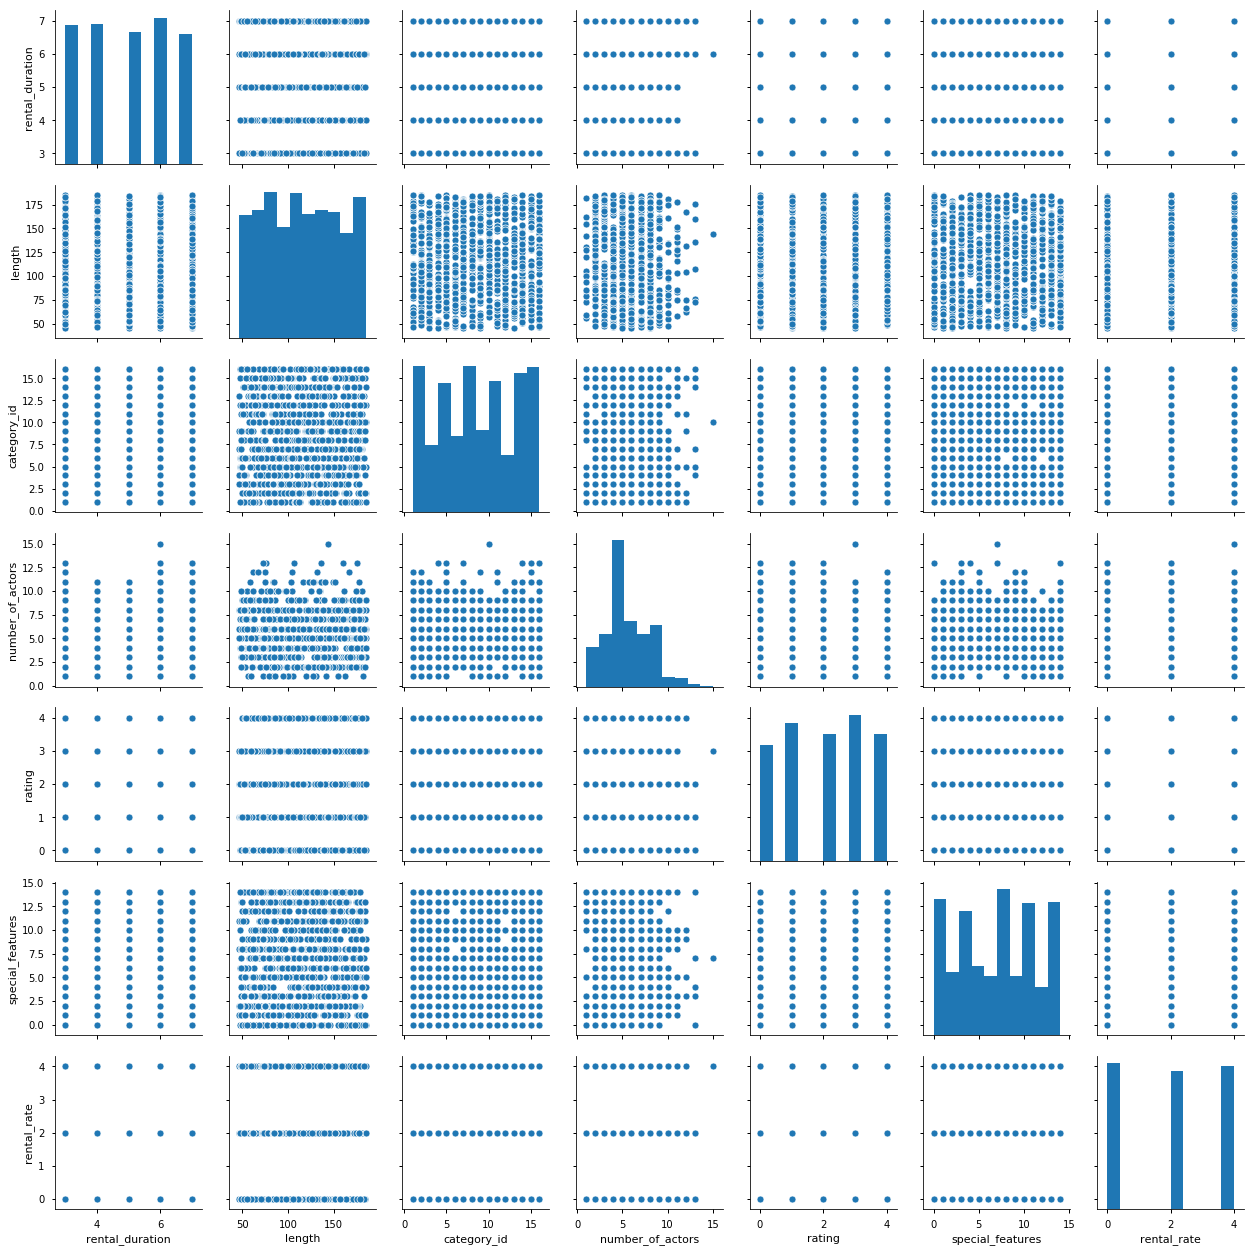

In [21]:
sns.pairplot(films)

From the pairplots, it is found that rating and rental duration has similar pairplots with rental_rate. So are the other four features. 

In [22]:
films.corr()

,rental_duration,length,category_id,number_of_actors,rating,special_features,rental_rate
rental_duration,1.000000,0.057210,0.002925,0.005870,-0.030461,-0.099465,0.020694
length,0.057210,1.000000,0.048924,0.010940,0.074435,-0.018176,0.025897
category_id,0.002925,0.048924,1.000000,0.019622,0.043756,-0.018706,0.089773
number_of_actors,0.005870,0.010940,0.019622,1.000000,-0.025141,-0.038324,-0.029508
rating,-0.030461,0.074435,0.043756,-0.025141,1.000000,0.003180,0.008169
special_features,-0.099465,-0.018176,-0.018706,-0.038324,0.003180,1.000000,-0.050610
rental_rate,0.020694,0.025897,0.089773,-0.029508,0.008169,-0.050610,1.000000


From the correlation, it is found that both number_of_actors and special_features have negative correlation with rental_rate. 

In [23]:
# Create new columns
films.eval('type = rating / (category_id + 0.01)', inplace=True)
films.eval('actors_and_features = number_of_actors / ( special_features + 0.01)', inplace=True)
films.eval('rating_rental_duration = rating * rental_duration ', inplace=True)
films.eval('category_and_length = category_id * length', inplace=True)

In [24]:
films.head()

,rental_duration,length,category_id,number_of_actors,rating,special_features,rental_rate,type,actors_and_features,rating_rental_duration,category_and_length
0,7,117,12,7,1,14,4,0.083264,0.499643,7,1404
1,5,49,12,4,4,0,4,0.333056,400.000000,20,588
2,6,54,11,4,4,14,4,0.363306,0.285510,24,594
3,4,73,7,4,3,14,4,0.427960,0.285510,12,511
4,6,86,6,10,2,5,0,0.332779,1.996008,12,516


In [25]:
# Use min-max method to normalize the data for further clustering
new_films = films
new_films=((new_films - new_films.min()) / (new_films.max() - new_films.min()))

In [26]:
# Select features and targets to apply classification on 
features = new_films.drop(columns=['rental_rate'])
films['rental_rate'] = films['rental_rate'].astype(str)
films['rental_rate'] = films['rental_rate'].map({'0':'Cheap', '2':'Moderate', '4':'Expensive'})
targets = films['rental_rate']

# Clustering
kmeans = KMeans().fit(features)
new_films['clustering'] = list(kmeans.labels_)
features = new_films.drop(columns=['rental_rate'])

# Split data set into traing and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, train_size=0.67, random_state=11111)

In [27]:
# Classification

# Following comments are the models we attempted

# rf = DecisionTreeClassifier(criterion="gini",random_state=111)
# rf = AdaBoostClassifier(n_estimators=45, random_state=101)
#rf = KNeighborsClassifier()
#rf = RidgeClassifier(alpha=0.6)

# Finally chosen ridge classifier
rf = RidgeClassifier(alpha=0.35)
rf = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('predicted result:')
print(y_pred)

predicted result:
['Cheap' 'Cheap' 'Moderate' 'Moderate' 'Expensive' 'Cheap' 'Cheap'
 'Moderate' 'Expensive' 'Cheap' 'Expensive' 'Moderate' 'Expensive' 'Cheap'
 'Cheap' 'Cheap' 'Expensive' 'Expensive' 'Moderate' 'Cheap' 'Expensive'
 'Cheap' 'Moderate' 'Moderate' 'Moderate' 'Cheap' 'Cheap' 'Expensive'
 'Cheap' 'Expensive' 'Moderate' 'Cheap' 'Moderate' 'Expensive' 'Expensive'
 'Moderate' 'Expensive' 'Expensive' 'Expensive' 'Expensive' 'Cheap'
 'Expensive' 'Expensive' 'Expensive' 'Cheap' 'Moderate' 'Expensive'
 'Expensive' 'Cheap' 'Expensive' 'Cheap' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Cheap' 'Expensive' 'Cheap' 'Cheap' 'Expensive' 'Cheap'
 'Cheap' 'Cheap' 'Expensive' 'Moderate' 'Cheap' 'Cheap' 'Expensive'
 'Moderate' 'Moderate' 'Expensive' 'Cheap' 'Moderate' 'Moderate'
 'Expensive' 'Expensive' 'Expensive' 'Expensive' 'Expensive' 'Moderate'
 'Expensive' 'Expensive' 'Expensive' 'Expensive' 'Cheap' 'Cheap'
 'Expensive' 'Expensive' 'Expensive' 'Expensive' 'Expensive' 'Cheap'
 'Mode

In [28]:
# Create a function to compare the results with or without implementing clustering algorithm as preprocessing
def classification(classifier, using_clustering, random_state, comparison_score):
    
    new_films = films
    new_films = new_films.drop(columns=['rental_rate'])
    new_films = ((new_films - new_films.min()) / (new_films.max() - new_films.min()))
#     new_films = films / films.mean()

    # Select features and targets to apply classification on 
    features = new_films
    targets = films['rental_rate']
    
    max_score = 0
    min_score = 1
    count = 0
    
    for i in range(100):
        if using_clustering == True:
            kmeans = KMeans().fit(features)
            new_films['clustering'] = list(kmeans.labels_)

        # Split data set into traing and testing sets
        x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, train_size=0.67, random_state=random_state)

        # Classification
        
        # rf = DecisionTreeClassifier(criterion="gini",random_state=111)
        # rf = AdaBoostClassifier(n_estimators=45, random_state=101)
        # rf = KNeighborsClassifier()
        # rf = RidgeClassifier(alpha=0.35)
        rf = classifier
        rf = rf.fit(x_train, y_train)  
        y_pred = rf.predict(x_test)

        # Compute the accuracy
        score = metrics.accuracy_score(y_test, y_pred)
        if score > max_score:
            max_score = score
        if score < min_score:
            min_score = score
        if using_clustering == True:
            if score > comparison_score:
                count = count + 1

    if using_clustering == False:
        print('The max accuracy without clustering is ' + str(max_score))
        print('The min accuracy without clustering is ' + str(min_score))
        return max_score
    if using_clustering == True:
        print('The max accuracy with clustering is ' + str(max_score))
        print('The min accuracy with clustering is ' + str(min_score))
        print('There are ' + str(count) + ' times that the accuracy is higher than '+str(comparison_score)+' after clustering')

In [30]:
#classifier = LinearSVC(C=1.0,penalty='l2')
classifier = RidgeClassifier(alpha=0.35)
#classifier = DecisionTreeClassifier(criterion="gini",random_state=111)
max_score = classification(classifier, False, 11111, 0)
classification(classifier, True, 11111, max_score)

The max accuracy without clustering is 0.396969696969697
The min accuracy without clustering is 0.396969696969697
The max accuracy with clustering is 0.4212121212121212
The min accuracy with clustering is 0.37272727272727274
There are 67 times that the accuracy is higher than 0.396969696969697 after clustering


#### <span style="color:blue"> Your justifications & commentary here: </span>

In order to find the most suited features,  .csv files about category and actor are loaded and merged with the file about film.  However, there are too many rows in film_actor file so we just keep the number of actors in each film. After trying different features, we kept rental_duration, length, category_id, number_of_actors, rating and special_features. 

Additionally, we encoded rating and special_features into integer and cast the rental_rate column into integer to make them available for further classification. With all the necessry data ready for the classification, two new columns are created from the existing data set. The first one is related to type which combines column rating and category_id and the second one is inspired by their correaltion with rental_rate. We checked their correlation with rental_rate first and found that their correlation are both negative so that we just divided number_of_actors by special_features into a column about the actors and features. 

Then, we plot pairplots using sns to compare rental_rate and other features and find that rental_duration and rating have similar pairplot with rental_rate and so are category_id and length so that we created two more columns using this similarity in pairplots. Whether the new column should be a quotient or product is determined after trying and the better one is kept. Finally, different classifier models are tested seperately and RidgeClassifier is kept in the end because the current datais quite high dimensional and linearly separable and RidgeClassifier can avoid overfitting using l2 regularization. After seleveral times of trying different alpha, the result is experienced to be best when alpha is around 0.35 so that alpha=0.35 is kept in the end. 

#### Would you be able to get a better result, if you had used Clustering as a pre-processing step before Classfication? Justify your answer. 
<span style= 'float: right;'><b>[5 marks]</b></span>

####  <span style="color:blue"> Your answer here: </span>

The result will indeed get better if clustering is implemented as a pre-propessing step before classification. In order to avoid coincidence, a funtion is constructed to calculate the score for 100 times and found the maximum score and minimum score and the total times when score is higher than classification without clustering first. It is shown that there are average more than 60 times that the process with clustering has higher score than without clustering, which probability is more than a half to improve the performance. 

From the test above, it is clear that clustering can improve the performance of classification. The reason why clustering can help to classification is come up with based on some intuitions:  Clustering algorithms can group these data points into different clusters based on their similarities, which is an unsupervised process and might find something from unlabeled data. Classification, however, is a supervised process which is based on training labeled data and predict the test data using trained model. The combination of clustering and classification can take the advantage of both supervised and unsupervised learning to improve the prediction performance.

***

## Section D - Decision Trees (10 Marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split on a range of age values.
* Attribute selection in the tree uses information gain 

#### 1. What is the initial entropy of Cloudy?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE


</span>

The entropy is calculated as $H(X) = -\Sigma_{x\in X}p(x)log_2p(x)$. In the given dataset, there are 12 days in total, where the 'Cloudy' is 'No' in 9 days, and 'Yes' in 3 days. Thus, the distribution is $\frac{9}{12} = \frac{3}{4}$ no cloudy, $\frac{3}{12} = \frac{1}{4}$ cloudy. The initial entropy of Cloudy is $E(Cloudy) = -\frac{3}{4}log_2\frac{3}{4} - \frac{1}{4}log_2\frac{1}{4} = 0.8113$.

#### 2. Which attribute would you choose to place at the root of a decision tree? Why?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE


</span>

We categorize temperature into 25-26(L), 27-28(M),29-30(H). Then the new dataset is like:

|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|L|No| Low| Low| No 
|H|No| Low| High| No
|L|No| Low| Medium| No
|L|No| Medium| Medium| No
|M|No| Medium| High| No
|M|No| High | High| No
|L|No| High |Low| No
|H|Yes| Low |Low| Yes
|M|No| Medium| High| Yes
|M|Yes| Medium| High| Yes
|L|No| Low |Low| Yes
|M|Yes| Low |High| Yes

We want the attribute at the root could best classify the data. Hence, based on information theory and the lecture slides, the attribute at the root should have the highest information gain among the features.


$$E(Rain) = -\frac{5}{12}log_2\frac{5}{12} - \frac{7}{12}log_2\frac{7}{12} = 0.9799 $$

$$E(Rain,Temperature) =  P(L) * E(1,4) + P(M) * E(3,2) + P(H) * E(1,1)  $$

$$= \frac{5}{12} * (-\frac{1}{5} * log_2\frac{1}{5} - \frac{4}{5} * log_2\frac{4}{5}) + \frac{5}{12} * (-\frac{3}{5} * log_2\frac{3}{5} - \frac{2}{5} * log_2\frac{2}{5}) + \frac{1}{6} * (-\frac{1}{2} * log_2\frac{1}{2} - \frac{1}{2} * log_2\frac{1}{2}) = 0.8720 $$

So in the same fashion:

$$E(Rain,UV Index) = P(Low) * E(3,3) + P(Medium) * E(2,2) + P(High) * E(0,2) = 0.8333$$

$$E(Rain,Humidity) = P(Low) * E(2,2) + P(Medium) * E(0,2) + P(High) * E(3,3) =  0.8333$$

$$E(Rain,Cloudy) = P(Yes) * E(3,0) + P(No) * E(2,7) = 0.5732$$

Then we can compute the Information Gain for each attribute:

$$IG(Rain,Temperature) = E(Rain) - E(Rain,Temperature) = 0.9799 - 0.8720 = 0.1079 $$

$$IG(Rain,UV Index) = E(Rain) - E(Rain,UV Index) = 0.9799 - 0.8333 = 0.1466 $$

$$IG(Rain,Humidity) = E(Rain) - E(Rain,Humidity) = 0.9799 - 0.8333 = 0.1466 $$

$$IG(Rain,Cloudy) = E(Rain) - E(Rain,Cloudy) = 0.9799 - 0.5732 = 0.4067 $$

Among the four features, the attribute 'Cloudy' has the highest information gain, therefore it should be put at the root of the decision tree.

#### 3. Calculate and specify the information gain of the attribute you chose in the previous question.

<span style= 'float: right;'><b>[4 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE


</span>

The attribute chosen is 'Cloudy'.
$$E(Rain) = -\frac{5}{12}log_2\frac{5}{12} - \frac{7}{12}log_2\frac{7}{12} = 0.9799 $$

$$E(Rain,Cloudy) = P(Yes) * E(3,0) + P(No) * E(2,7) = 0.5732$$

$$IG(Rain,Cloudy) = E(Rain) - E(Rain,Cloudy) = 0.9799 - 0.5732 = 0.4067 $$
